In [1]:
import cv2
import matplotlib.pyplot as plt

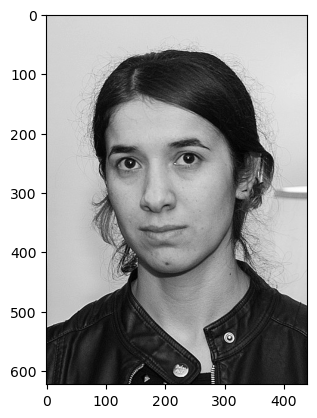

In [2]:
nadia = cv2.imread(r"C:\Users\visha\Downloads\Nadia_Murad.jpg")
denis = cv2.imread(r"C:\Users\visha\Downloads\Denis_Mukwege.jpg")
solvay = cv2.imread(r"C:\Users\visha\Downloads\solvay_conference.jpg")

nadia = cv2.cvtColor(nadia,cv2.COLOR_BGR2GRAY)
denis = cv2.cvtColor(denis,cv2.COLOR_BGR2GRAY)
solvay = cv2.cvtColor(solvay,cv2.COLOR_BGR2GRAY)
plt.imshow(nadia,cmap="gray")

In [3]:
#Cascade files 
face_cascade = cv2.CascadeClassifier(r"C:\Users\visha\Downloads\haarcascade_frontalface_default.xml")

In [29]:
def detect_face(img):
    face_img =img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,0),5)
    return face_img


In [30]:
result = detect_face(nadia)
result1 = detect_face(denis)
result2 = detect_face(solvay)

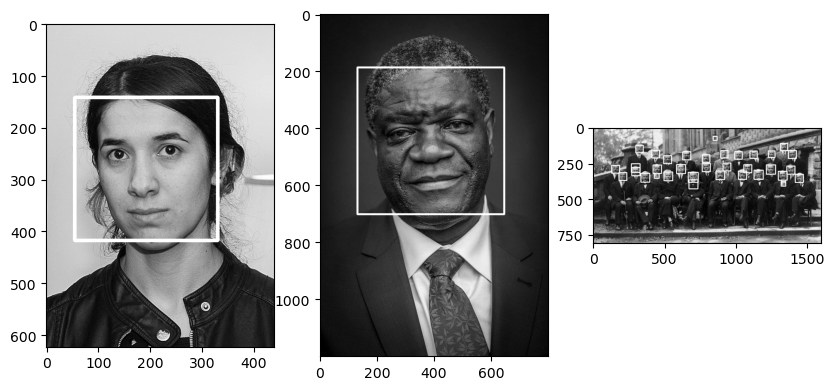

In [31]:
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
plt.imshow(result,cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(result1,cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(result2,cmap="gray")

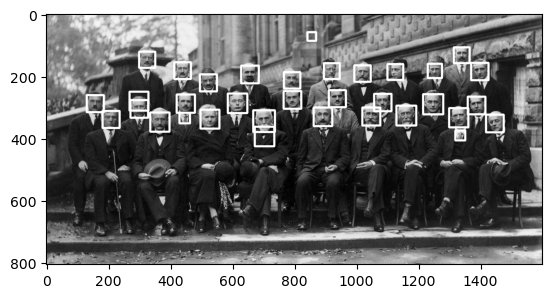

In [32]:
plt.imshow(result2,cmap="gray")

In [8]:
def adv_detect_face(img):
    face_img =img.copy()
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,0),5)
    return face_img
#reduce the scale size -> scaleFActor: this parameter determines how much the image size is reduces at each image scale or
#it specifies the factor by which the image is scale down in each iteration   
#it will check min of 5 neighbour it will check


#min neighbours: set the threshold for howmany rectangles need to overlap to be considered as valid detection  the value range from 3-5

In [9]:
adv_detect_face(solvay)

array([[138, 153, 145, ..., 195, 194, 190],
       [134, 142, 137, ..., 191, 188, 184],
       [132, 129, 130, ..., 186, 182, 178],
       ...,
       [184, 189, 188, ..., 197, 189, 183],
       [182, 194, 190, ..., 197, 193, 183],
       [179, 188, 186, ..., 197, 196, 183]], dtype=uint8)

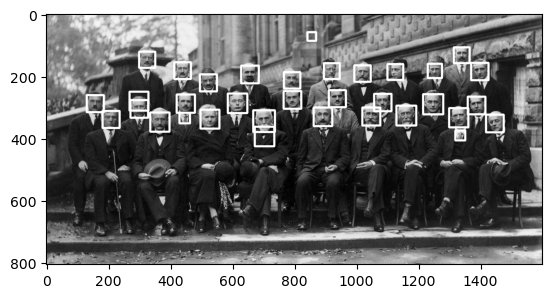

In [10]:
plt.imshow(result2,cmap="gray")

In [15]:
eye_cascade = cv2.CascadeClassifier(r"C:\Users\visha\Downloads\haarcascade_eye.xml")

In [22]:
def detect_eye(img):
    face_img =img.copy()
    face_rects = eye_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,0),5)
    return face_img

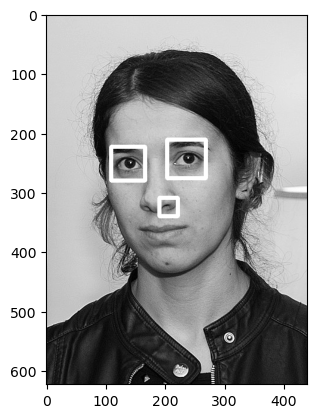

In [23]:
res1 = detect_eye(nadia)
plt.imshow(res1,cmap="gray")

In [34]:
#real video 
cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read(0)
    frame = detect_face(frame)
    cv2.imshow("video face detection",frame)
    
    c = cv2.waitKey(1)
    if c == 27:
        break
        
        
cap.release()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'copy'